In [20]:
# Trabajar con DataFrames
# -----------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_jugadores=pd.read_csv(f'../../data/transformed/stats_jugadores_transformed.csv')
df_info=pd.read_csv(f'../../data/transformed/info_clubes_transformed.csv')
clasificaciones_df=pd.read_csv(f'../../data/transformed/clasificaciones_premier_transformed.csv')
asistencia_df=pd.read_csv(f'../../data/transformed/asistencia_estadios_transformed.csv')
df_clubes=pd.read_csv(f'../../data/transformed/clubes.csv')

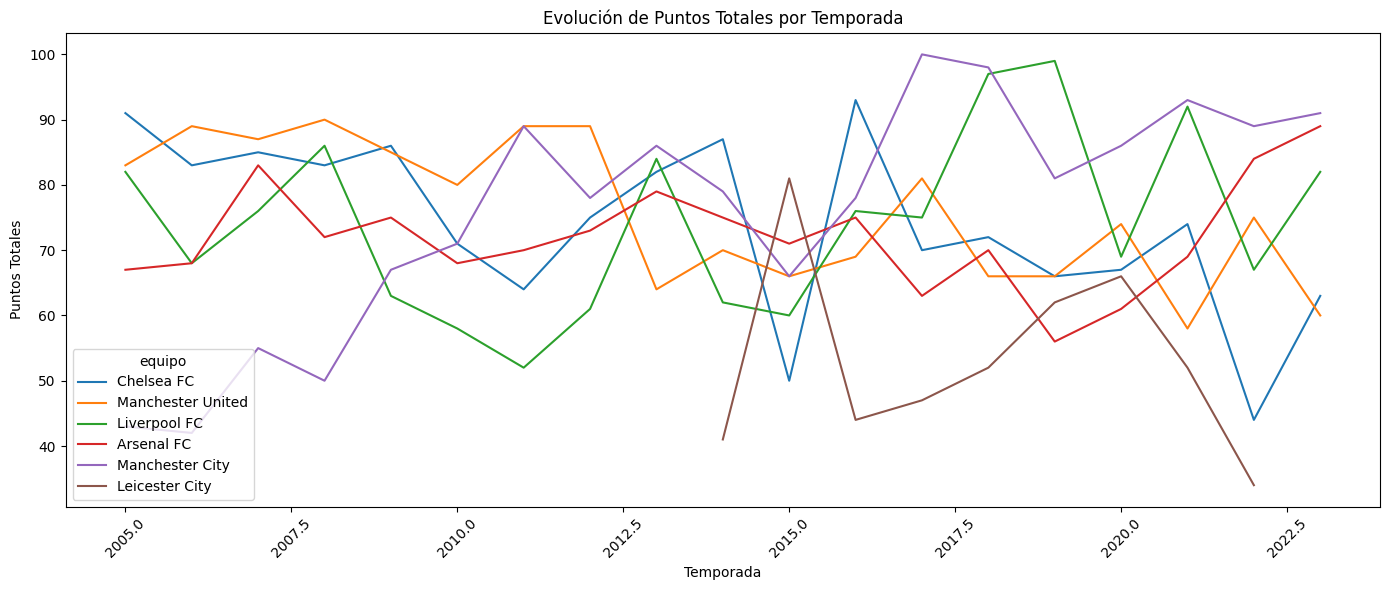

In [23]:
Equipos_seleccionados = ['Arsenal FC', 'Manchester United', 'Manchester City', 'Liverpool FC', 'Chelsea FC','Leicester City']
datos_filtrados = clasificaciones_df[clasificaciones_df['equipo'].isin(Equipos_seleccionados)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=datos_filtrados, x='temporada', y='puntos_total', hue='equipo')
plt.title('Evolución de Puntos Totales por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Puntos Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


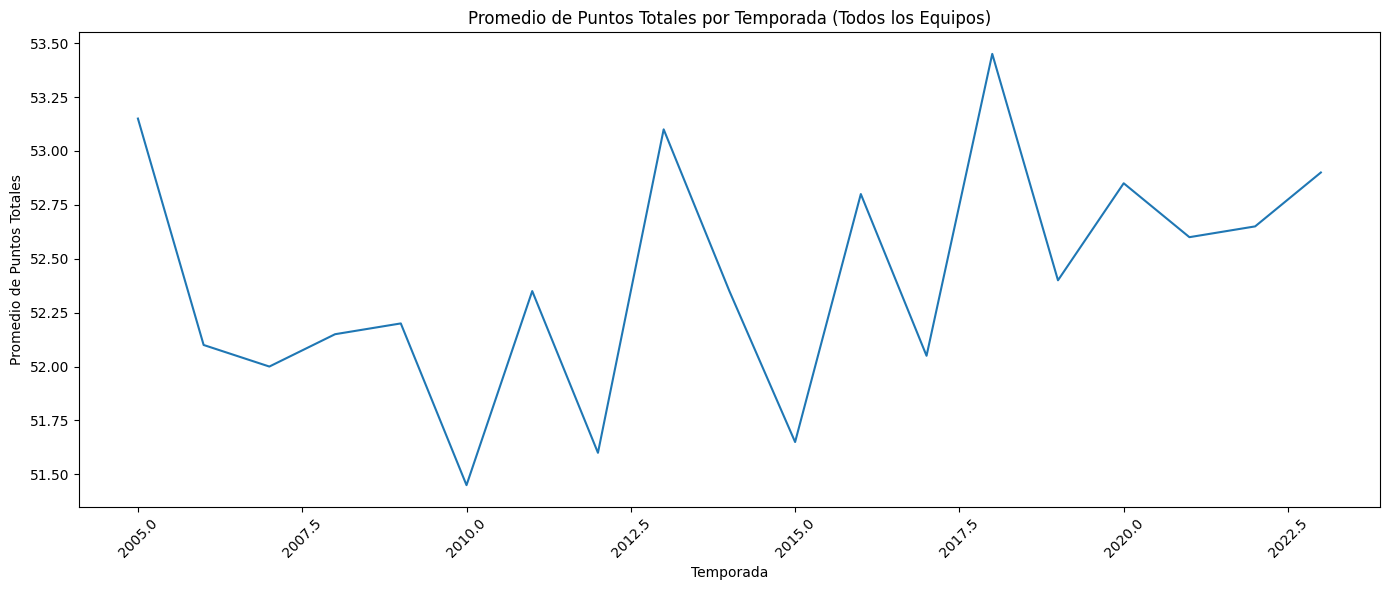

In [24]:
media_puntos_temporada = clasificaciones_df.groupby('temporada')['puntos_total'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=media_puntos_temporada, x='temporada', y='puntos_total')
plt.title('Promedio de Puntos Totales por Temporada (Todos los Equipos)')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

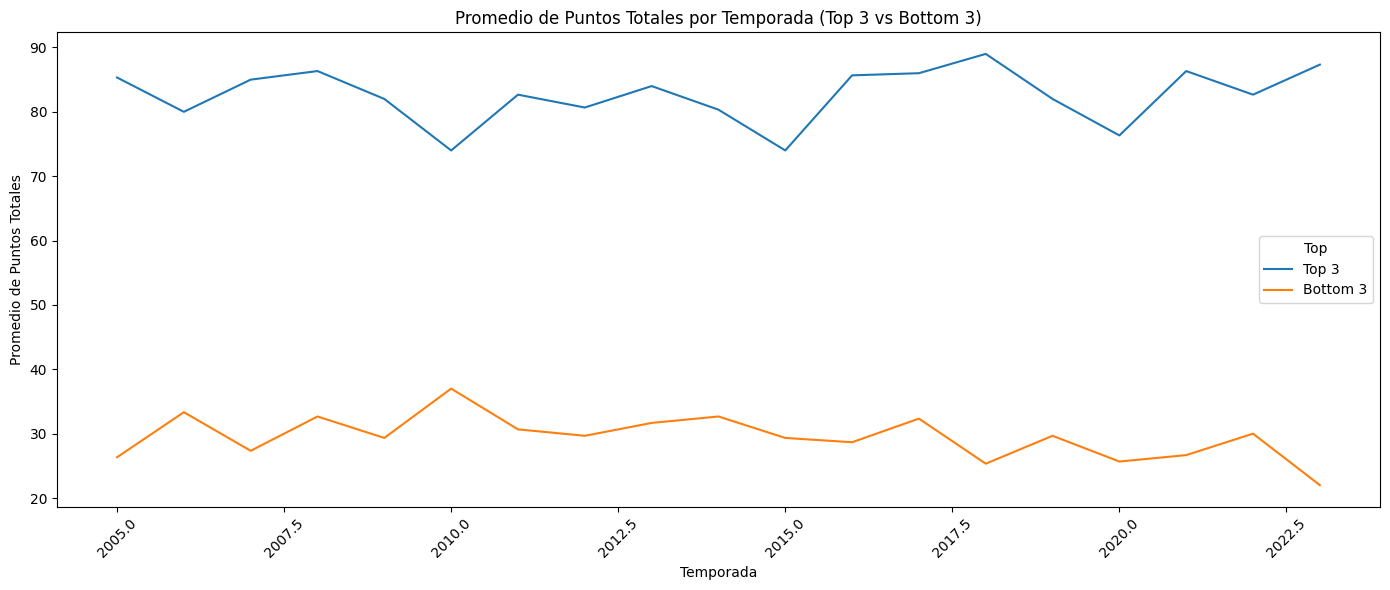

In [31]:
top_teams = clasificaciones_df[clasificaciones_df['posicion'].between(1, 3)].groupby('temporada')['puntos_total'].mean().reset_index()
top_teams['Top'] = 'Top 3'

bottom_teams = clasificaciones_df[clasificaciones_df['posicion'].between(18, 20)].groupby('temporada')['puntos_total'].mean().reset_index()
bottom_teams['Top'] = 'Bottom 3'

combined_average_top_bottom_3 = pd.concat([top_teams, bottom_teams]).reset_index(drop=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_average_top_bottom_3, x='temporada', y='puntos_total', hue='Top')
plt.title('Promedio de Puntos Totales por Temporada (Top 3 vs Bottom 3)')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

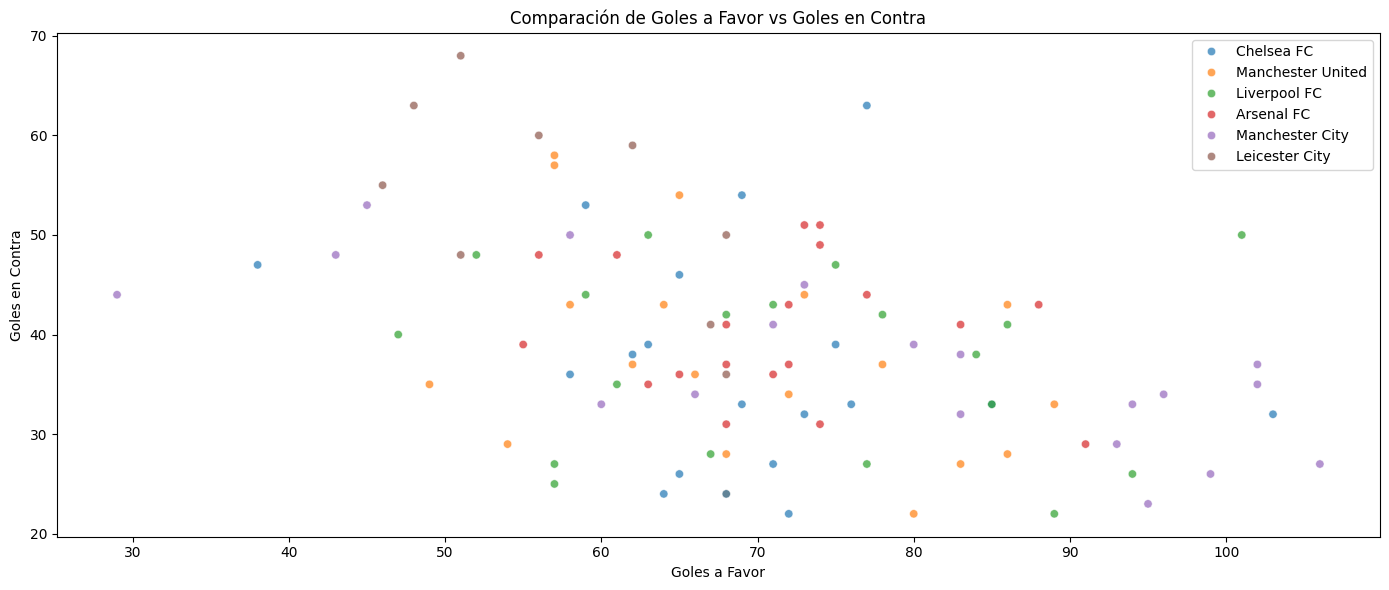

In [26]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=datos_filtrados, x='goles_favor_total', y='goles_contra_total', hue='equipo', alpha=0.7)
plt.title('Comparación de Goles a Favor vs Goles en Contra')
plt.xlabel('Goles a Favor')
plt.ylabel('Goles en Contra')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


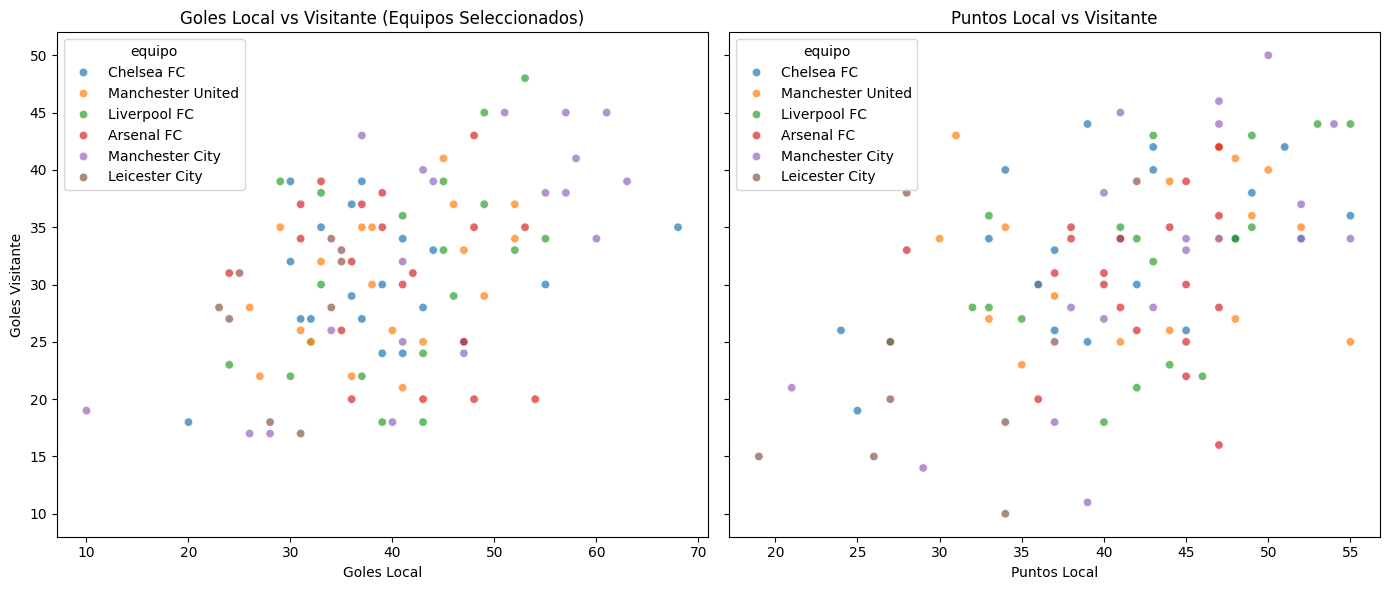

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.scatterplot(data=datos_filtrados, x='goles_favor_local', y='goles_favor_visitante', hue='equipo', alpha=0.7, ax=ax[0])
ax[0].set_title('Goles Local vs Visitante (Equipos Seleccionados)')
ax[0].set_xlabel('Goles Local')
ax[0].set_ylabel('Goles Visitante')

sns.scatterplot(data=datos_filtrados, x='puntos_local', y='puntos_visitante', hue='equipo', alpha=0.7, ax=ax[1])
ax[1].set_title('Puntos Local vs Visitante')
ax[1].set_xlabel('Puntos Local')
ax[1].set_ylabel('Puntos Visitante')

plt.tight_layout()
plt.show()


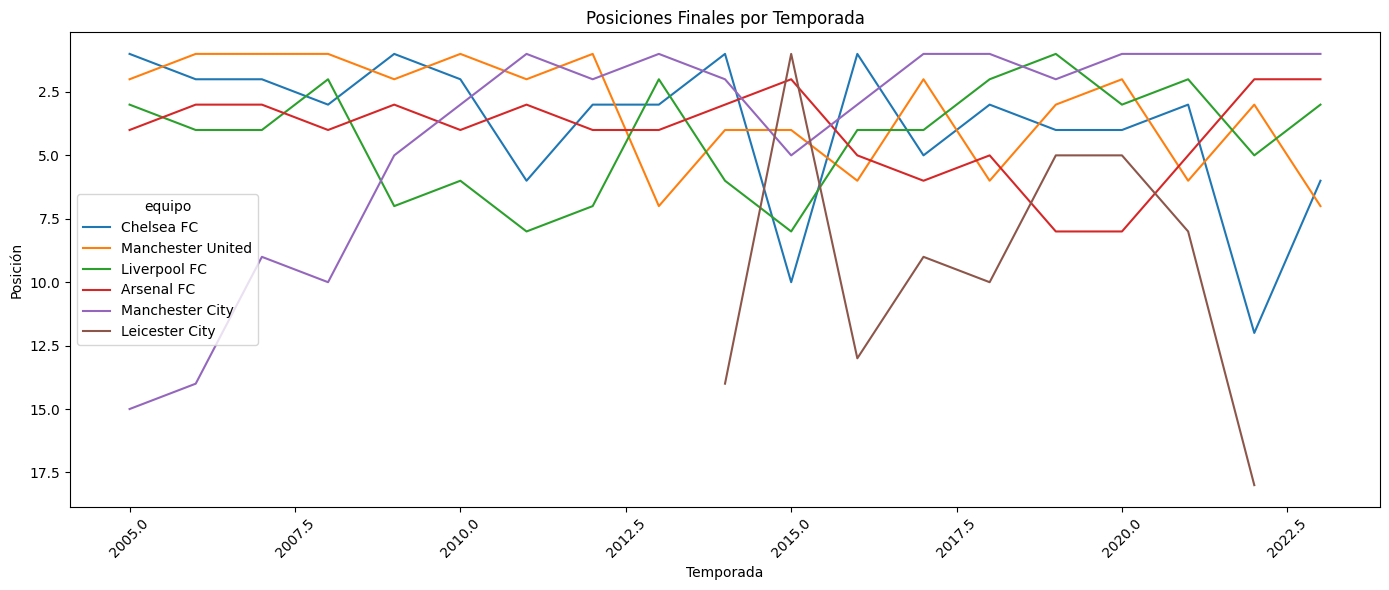

In [28]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=datos_filtrados, x='temporada', y='posicion', hue='equipo')
plt.title('Posiciones Finales por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Posición')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

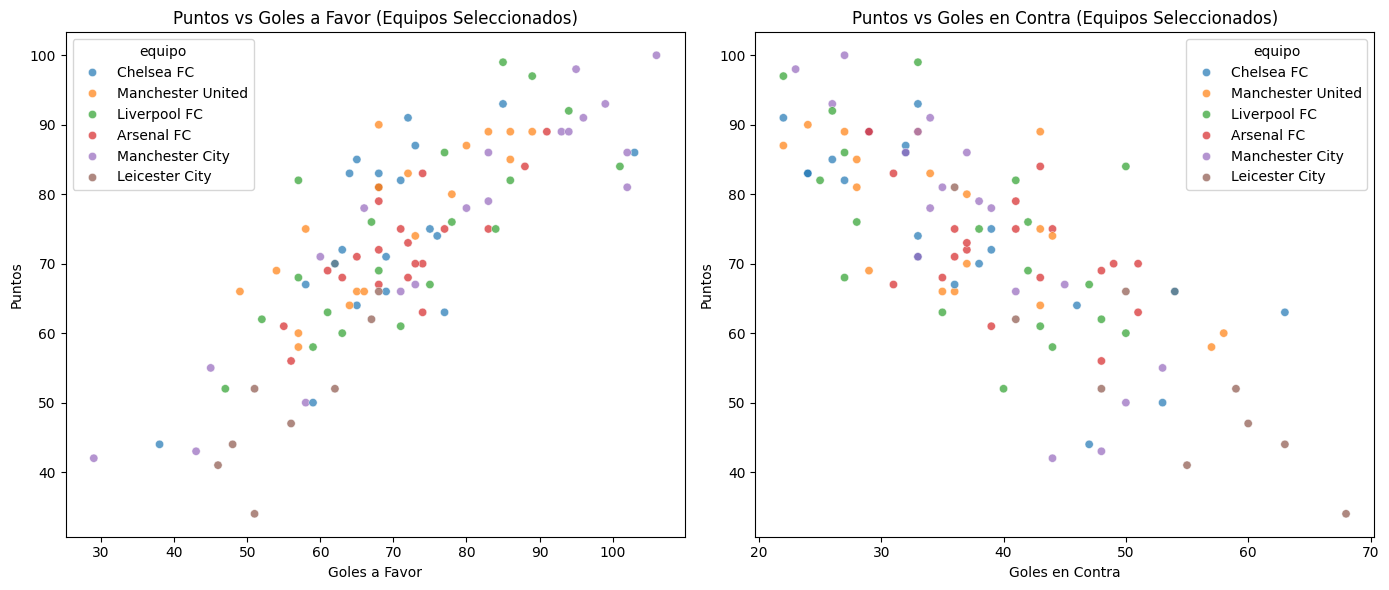

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=datos_filtrados, x='goles_favor_total', y='puntos_total', hue='equipo', alpha=0.7, ax=ax[0])
ax[0].set_title('Puntos vs Goles a Favor (Equipos Seleccionados)')
ax[0].set_xlabel('Goles a Favor')
ax[0].set_ylabel('Puntos')

sns.scatterplot(data=datos_filtrados, x='goles_contra_total', y='puntos_total', hue='equipo', alpha=0.7, ax=ax[1])
ax[1].set_title('Puntos vs Goles en Contra (Equipos Seleccionados)')
ax[1].set_xlabel('Goles en Contra')
ax[1].set_ylabel('Puntos')

plt.tight_layout()
plt.show()


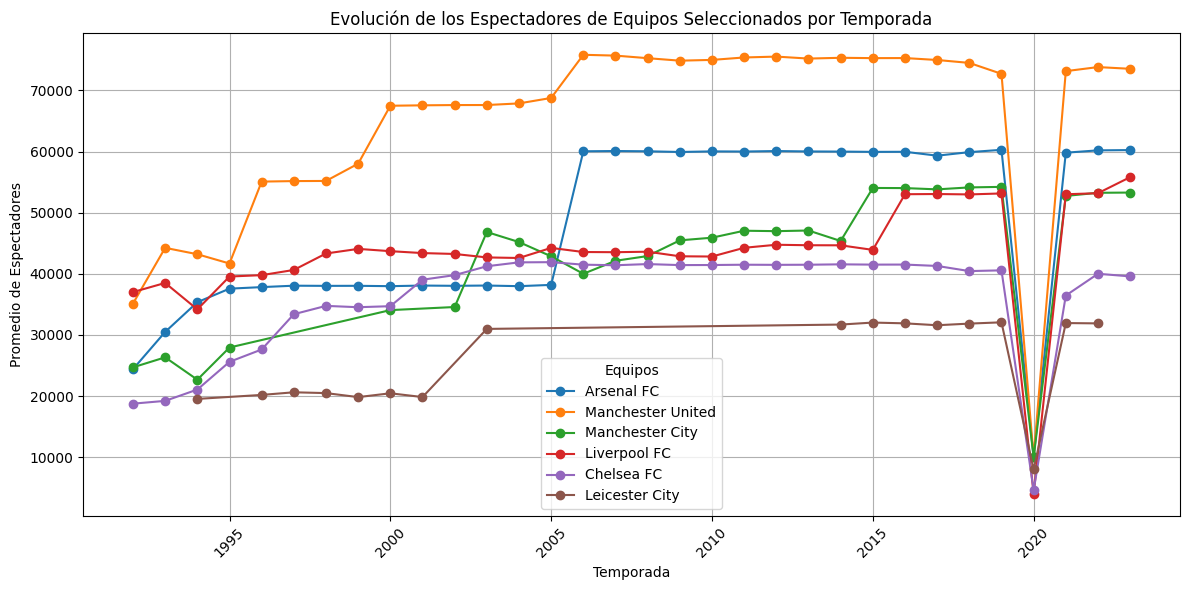

In [30]:
datos_filtrados = asistencia_df[asistencia_df['Equipo'].isin(Equipos_seleccionados)]

plt.figure(figsize=(12, 6))

for team in Equipos_seleccionados:
    team_data = datos_filtrados[datos_filtrados['Equipo'] == team]
    plt.plot(team_data['Temporada'], team_data['Promedio'], marker='o', label=team)

plt.title('Evolución de los Espectadores de Equipos Seleccionados por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Espectadores')
plt.xticks(rotation=45)  
plt.grid()
plt.legend(title='Equipos')
plt.tight_layout()
plt.show()